<a href="https://colab.research.google.com/github/Alwin-Sajan/Alwin-Sajan.github.io/blob/main/Face_detection_inital_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install insightface opencv-python onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.7 MB/s eta 0:00:00


In [4]:
import insightface
import cv2
import numpy as np

# Initialize the model
model = insightface.app.FaceAnalysis()

# Prepare the model (use GPU with ctx_id=0 or CPU with ctx_id=-1)
model.prepare(ctx_id=0, det_size=(640, 640))


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 68273.94KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


Saving download (2).png to download (2).png


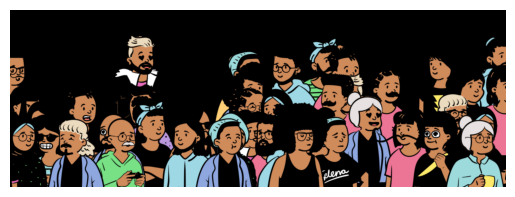

In [8]:
from google.colab import files
uploaded = files.upload()

# Load the image using OpenCV (after uploading)
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)

# Display the image to verify
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Detected face with confidence:  None
Face embedding:  [-0.90823126 -0.45986468  0.6948441  -1.3731171   0.07000757  1.4792339
 -0.22103171 -0.2458772  -0.29969537 -0.82167983  0.12285315 -0.50334543
  0.4454547  -1.3810418   0.5535637  -0.48926413  0.06933535 -1.5121772
 -1.8856515  -1.437968    0.24922638 -0.45550254 -0.18116717 -0.87104416
 -0.90785694  0.22586167 -0.688637   -0.20410407  0.39815557 -0.08113776
  0.10298221  0.05720907  0.49792022  0.7819072   1.4462312  -0.47574478
 -1.0835495   0.33327654 -0.5856453   0.8714331   0.7518557  -0.4483318
  1.4888532   0.52130926  0.02878407 -0.43198466 -1.0599324   1.2447343
  0.39191628  1.4863489   0.527897   -0.7526533   0.86436486  0.18480739
  0.79373944  0.4423533  -0.621648   -0.49756315  0.6591448  -1.0409244
  0.17315051 -0.41093257 -0.52483165  0.9647673  -1.7269974  -0.9417836
  0.30101442  0.90259624  1.356614   -0.47038084  0.45527473  1.429723
 -0.9277288   0.0985029   0.41660595  2.143364    1.0664607   0.25208706
 -0.9

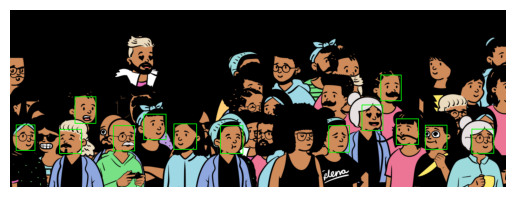

In [9]:
# Run face detection and analysis
faces = model.get(img)

# Display face detection results
for face in faces:
    print("Detected face with confidence: ", face.score)
    print("Face embedding: ", face.embedding)  # 128D face embedding

    # Draw bounding box on the image
    cv2.rectangle(img, (int(face.bbox[0]), int(face.bbox[1])), (int(face.bbox[2]), int(face.bbox[3])), (0, 255, 0), 2)

# Show the result with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
from scipy.spatial.distance import cosine

# Compare two embeddings (assume you have two embeddings: embedding1 and embedding2)
similarity = cosine(embedding1, embedding2)

if similarity < 0.6:  # This threshold can vary
    print("The faces match!")
else:
    print("The faces don't match!")
